# Convolutional Neural Networks and Computer Vision with Tensorflow


## Get data


Food101 dataset modified to have only pizza and steaks images

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2022-02-17 13:08:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   201MB/s    in 0.5s    

2022-02-17 13:08:32 (201 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

## Inspect the data

In [ ]:
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


750 images of pizza and 750 images of steak for training. 250 images of each to test.

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array([item.name for item in data_dir.glob('*')])
print(class_names)

['steak' 'pizza']


Classes names


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
                     
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')

  return img

Image shape: (512, 512, 3)


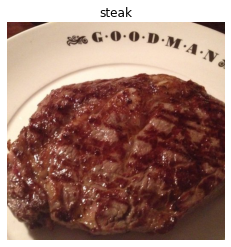

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/', target_class='steak')

In [ ]:
img.shape

(512, 512, 3)

(width, height, colour channels)

In [ ]:
img/255

array([[[0.36470588, 0.1254902 , 0.10588235],
        [0.38823529, 0.14901961, 0.12941176],
        [0.38431373, 0.15294118, 0.12941176],
        ...,
        [0.10588235, 0.0745098 , 0.06666667],
        [0.10980392, 0.0745098 , 0.07843137],
        [0.10588235, 0.07058824, 0.0745098 ]],

       [[0.38431373, 0.15294118, 0.12941176],
        [0.39215686, 0.16078431, 0.1372549 ],
        [0.38823529, 0.15686275, 0.13333333],
        ...,
        [0.1254902 , 0.08627451, 0.08235294],
        [0.11372549, 0.07843137, 0.08235294],
        [0.10588235, 0.07058824, 0.0745098 ]],

       [[0.4       , 0.17647059, 0.14901961],
        [0.4       , 0.17647059, 0.14901961],
        [0.39607843, 0.17254902, 0.14509804],
        ...,
        [0.13333333, 0.08627451, 0.08627451],
        [0.12156863, 0.08235294, 0.07843137],
        [0.10980392, 0.07058824, 0.06666667]],

       ...,

       [[0.90980392, 0.81568627, 0.68235294],
        [0.89411765, 0.8       , 0.66666667],
        [0.88627451, 0

normalized image (between 0 and 1)

## Models


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#train and test dir
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224x224
                                               class_mode='binary', # type of problem
                                               seed=42)

valid_data = train_datagen.flow_from_directory(test_dir,
                                              batch_size=32, # number of images to process at a time
                                              target_size=(224, 224), # convert all images to be 224x224
                                              class_mode='binary', # type of problem
                                              seed=42)

model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation='relu',
                                                             input_shape=(224, 224, 3)),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding='valid'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation='sigmoid')          
])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 274ms/step - loss: 0.5555 - accuracy: 0.7120 - val_loss: 0.4264 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 12s 248ms/step - loss: 0.4380 - accuracy: 0.7940 - val_loss: 0.3429 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 13s 286ms/step - loss: 0.3830 - accuracy: 0.8300 - val_loss: 0.3304 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 12s 248ms/step - loss: 0.3495 - accuracy: 0.8453 - val_loss: 0.3116 - val_accuracy: 0.8880
Epoch 5/5
47/47 [==============================] - 12s 254ms/step - loss: 0.2936 - accuracy: 0.8840 - val_loss: 0.3140 - val_accuracy: 0.8680


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

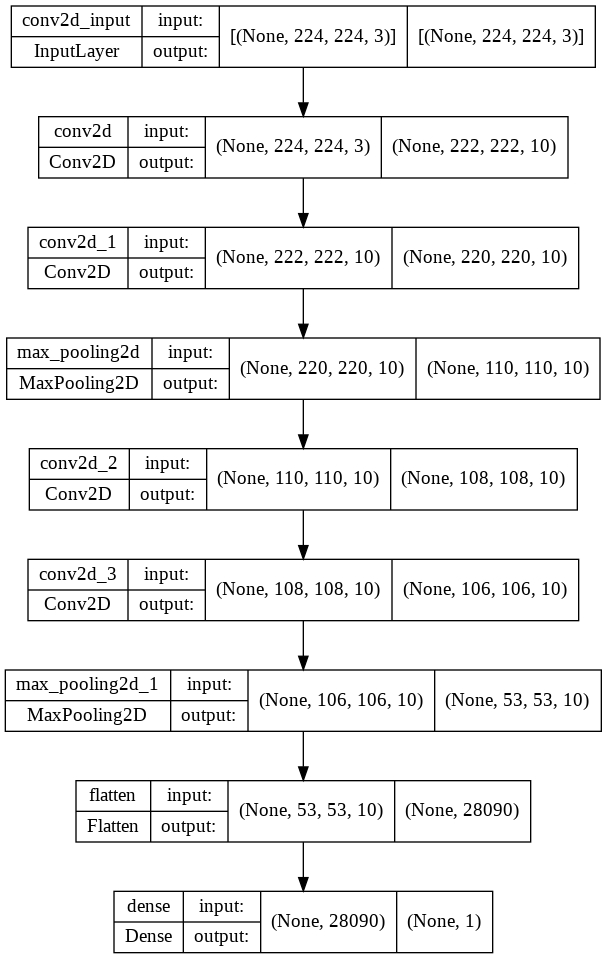

In [ ]:
tf.keras.utils.plot_model(model_1, show_shapes=True)

Without convolution, to see whats happen.

In [ ]:
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 232ms/step - loss: 2.5029 - accuracy: 0.6627 - val_loss: 0.4987 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.8033 - accuracy: 0.7167 - val_loss: 2.2779 - val_accuracy: 0.5280
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6734 - accuracy: 0.7393 - val_loss: 0.7384 - val_accuracy: 0.6440
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.7078 - accuracy: 0.7133 - val_loss: 0.5502 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.7568 - accuracy: 0.7100 - val_loss: 0.5531 - val_accuracy: 0.7480


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
images, labels = train_data.next()  # next batch of images

len(images), len(labels)

(32, 32)

In [ ]:
labels

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.],
      dtype=float32)

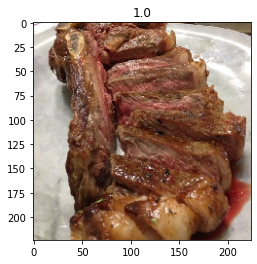

In [ ]:
plt.title(labels[5])
plt.imshow(images[5]);

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

Another model for test.

In [ ]:
model_3 = Sequential([
                      Conv2D(filters=10,
                             kernel_size=3,
                             strides=1,
                             padding='valid',
                             activation='relu',
                             input_shape=(224, 224, 3)),
                      Conv2D(10, 3, activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      Flatten(),
                      Dense(1, activation='sigmoid')                    
])

model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
len(train_data), len(valid_data)

(47, 16)

47 batchs for train and 16 for test

In [ ]:
1500/32, 500/32

(46.875, 15.625)

In [ ]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 88s 2s/step - loss: 0.7700 - accuracy: 0.6667 - val_loss: 0.4839 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 86s 2s/step - loss: 0.4374 - accuracy: 0.8087 - val_loss: 0.4227 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 86s 2s/step - loss: 0.3665 - accuracy: 0.8467 - val_loss: 0.5069 - val_accuracy: 0.7500
Epoch 4/5
47/47 [==============================] - 86s 2s/step - loss: 0.3115 - accuracy: 0.8793 - val_loss: 0.3438 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 85s 2s/step - loss: 0.1978 - accuracy: 0.9347 - val_loss: 0.3720 - val_accuracy: 0.8440


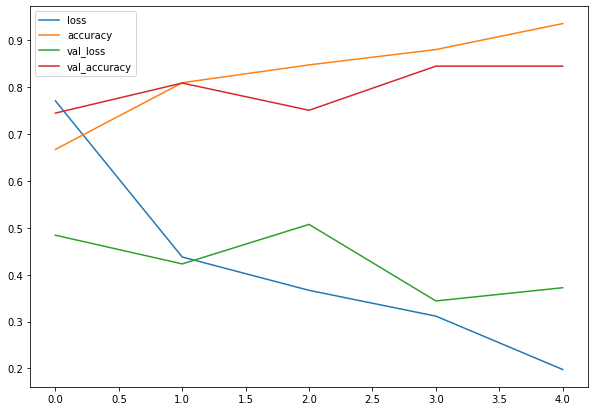

In [ ]:
import pandas as pd

pd.DataFrame(history_3.history).plot(figsize=(10, 7));

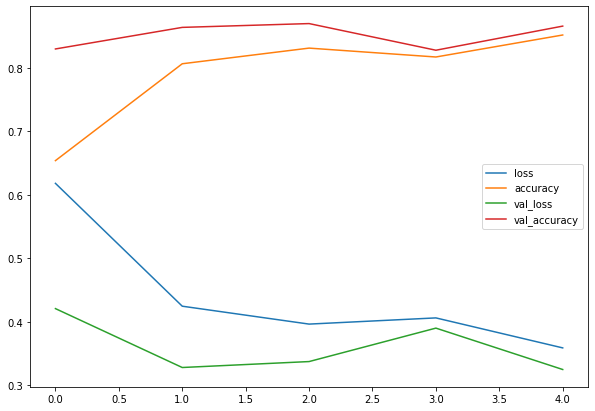

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

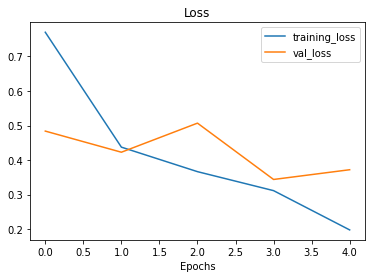

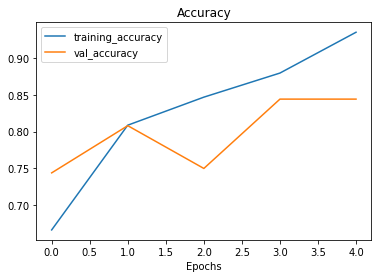

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_4 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(train_data, epochs=5,
            #steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 41s 846ms/step - loss: 0.6235 - accuracy: 0.6540 - val_loss: 0.4515 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 39s 838ms/step - loss: 0.4418 - accuracy: 0.8000 - val_loss: 0.4396 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 39s 837ms/step - loss: 0.4165 - accuracy: 0.8193 - val_loss: 0.3369 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 39s 832ms/step - loss: 0.3930 - accuracy: 0.8273 - val_loss: 0.3284 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 40s 850ms/step - loss: 0.3657 - accuracy: 0.8453 - val_loss: 0.3098 - val_accuracy: 0.8780


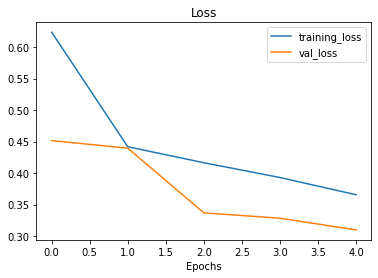

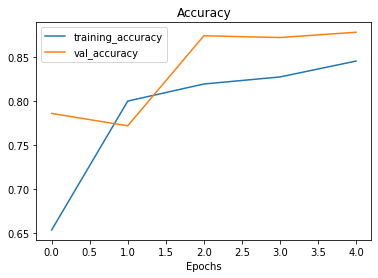

In [ ]:
plot_loss_curves(history_4)

## Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image between 0 a 20 degress
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom the image
                                             width_shift_range=0.2, # shift image
                                             height_shift_range=0.2, # shift image
                                             horizontal_flip=True) # flip the image

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

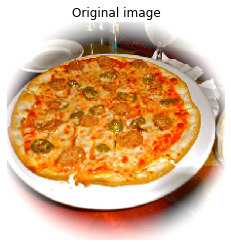

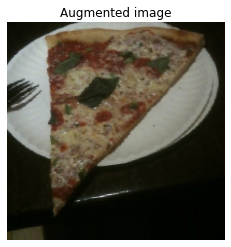

In [ ]:
i =  np.random.randint(32)
plt.imshow(images[i])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[i])
plt.title('Augmented image')
plt.axis(False);

In [ ]:
model_5 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data_augmented, epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 33s 713ms/step - loss: 0.6204 - accuracy: 0.6560 - val_loss: 0.4857 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 27s 572ms/step - loss: 0.5180 - accuracy: 0.7553 - val_loss: 0.3705 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 27s 579ms/step - loss: 0.4704 - accuracy: 0.7880 - val_loss: 0.3542 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 28s 593ms/step - loss: 0.4558 - accuracy: 0.7920 - val_loss: 0.3837 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 27s 574ms/step - loss: 0.4568 - accuracy: 0.7847 - val_loss: 0.3377 - val_accuracy: 0.8520


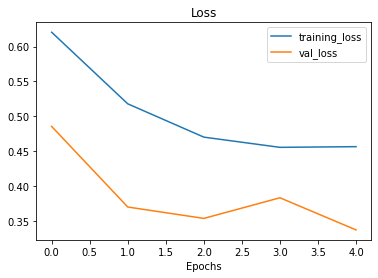

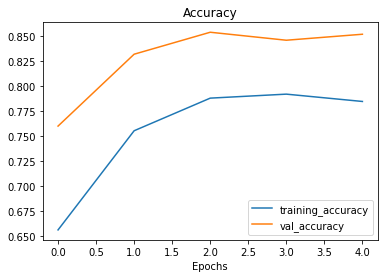

In [ ]:
plot_loss_curves(history_5)

In [ ]:
model_6 = Sequential([
                      Conv2D(filters=32,
                             kernel_size=3,
                             activation='relu',
                             input_shape=(224, 224, 3)),
                      Conv2D(32, 3, activation='relu'),
                      MaxPool2D(2),
                      Conv2D(32, 3, activation='relu'),
                      Conv2D(32, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(100, activation='relu'),
                      Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 33s 657ms/step - loss: 0.7518 - accuracy: 0.6247 - val_loss: 0.4731 - val_accuracy: 0.7680
Epoch 2/10
47/47 [==============================] - 29s 624ms/step - loss: 0.5871 - accuracy: 0.6887 - val_loss: 0.4420 - val_accuracy: 0.8120
Epoch 3/10
47/47 [==============================] - 29s 625ms/step - loss: 0.5196 - accuracy: 0.7413 - val_loss: 0.4017 - val_accuracy: 0.8260
Epoch 4/10
47/47 [==============================] - 30s 626ms/step - loss: 0.5184 - accuracy: 0.7473 - val_loss: 0.4259 - val_accuracy: 0.8000
Epoch 5/10
47/47 [==============================] - 29s 625ms/step - loss: 0.4709 - accuracy: 0.7687 - val_loss: 0.3555 - val_accuracy: 0.8280
Epoch 6/10
47/47 [==============================] - 30s 628ms/step - loss: 0.4712 - accuracy: 0.7767 - val_loss: 0.4291 - val_accuracy: 0.7840
Epoch 7/10
47/47 [==============================] - 29s 625ms/step - loss: 0.4553 - accuracy: 0.7967 - val_loss: 0.3190 - val_accuracy: 0.8580

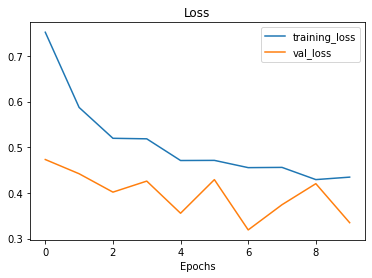

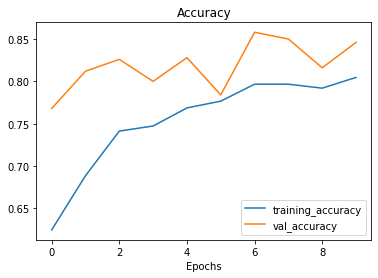

In [ ]:
plot_loss_curves(history_6)

## Making predictions

--2022-02-17 13:19:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2022-02-17 13:19:55 (28.0 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



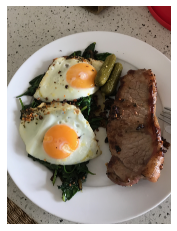

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
def load_and_prep_image(file, img_shape=224):

  img = tf.io.read_file(file)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255

  return img

In [ ]:
img = load_and_prep_image('03-steak.jpeg')
img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_6.predict(tf.expand_dims(img, axis=0))
pred

array([[0.9400765]], dtype=float32)

In [ ]:
class_names =  np.array(['pizza','steak'])
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(pred_class)
  plt.axis(False)

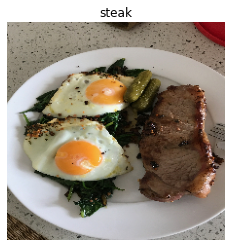

In [ ]:
pred_and_plot(model_6, '03-steak.jpeg', class_names)

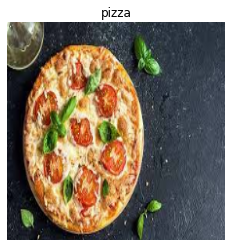

In [ ]:
pred_and_plot(model_6, 'pizza.jfif', class_names)

## Multiclass classifcation

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

!tar xzvf food-101.tar.gz

A saída de streaming foi truncada nas últimas 5000 linhas.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/

In [ ]:
import os

os.listdir('food-101/images')

['prime_rib',
 'strawberry_shortcake',
 'takoyaki',
 'pizza',
 'filet_mignon',
 'paella',
 'mussels',
 'eggs_benedict',
 'ravioli',
 'apple_pie',
 'peking_duck',
 'baklava',
 'pork_chop',
 'spaghetti_bolognese',
 'huevos_rancheros',
 'pad_thai',
 'breakfast_burrito',
 'cannoli',
 'fried_rice',
 'chicken_quesadilla',
 'french_toast',
 'garlic_bread',
 'chocolate_cake',
 'fried_calamari',
 'macarons',
 'ceviche',
 'crab_cakes',
 'club_sandwich',
 'dumplings',
 'spring_rolls',
 'bread_pudding',
 'sashimi',
 'risotto',
 'pho',
 'foie_gras',
 'frozen_yogurt',
 'grilled_salmon',
 'cheese_plate',
 'poutine',
 'bruschetta',
 'cheesecake',
 'caesar_salad',
 'beet_salad',
 'lasagna',
 'carrot_cake',
 'tuna_tartare',
 'beef_carpaccio',
 'falafel',
 'greek_salad',
 'guacamole',
 'hummus',
 'hamburger',
 'beef_tartare',
 'beignets',
 'waffles',
 'gnocchi',
 'baby_back_ribs',
 'grilled_cheese_sandwich',
 'steak',
 'edamame',
 'spaghetti_carbonara',
 'sushi',
 'macaroni_and_cheese',
 'churros',
 'cup

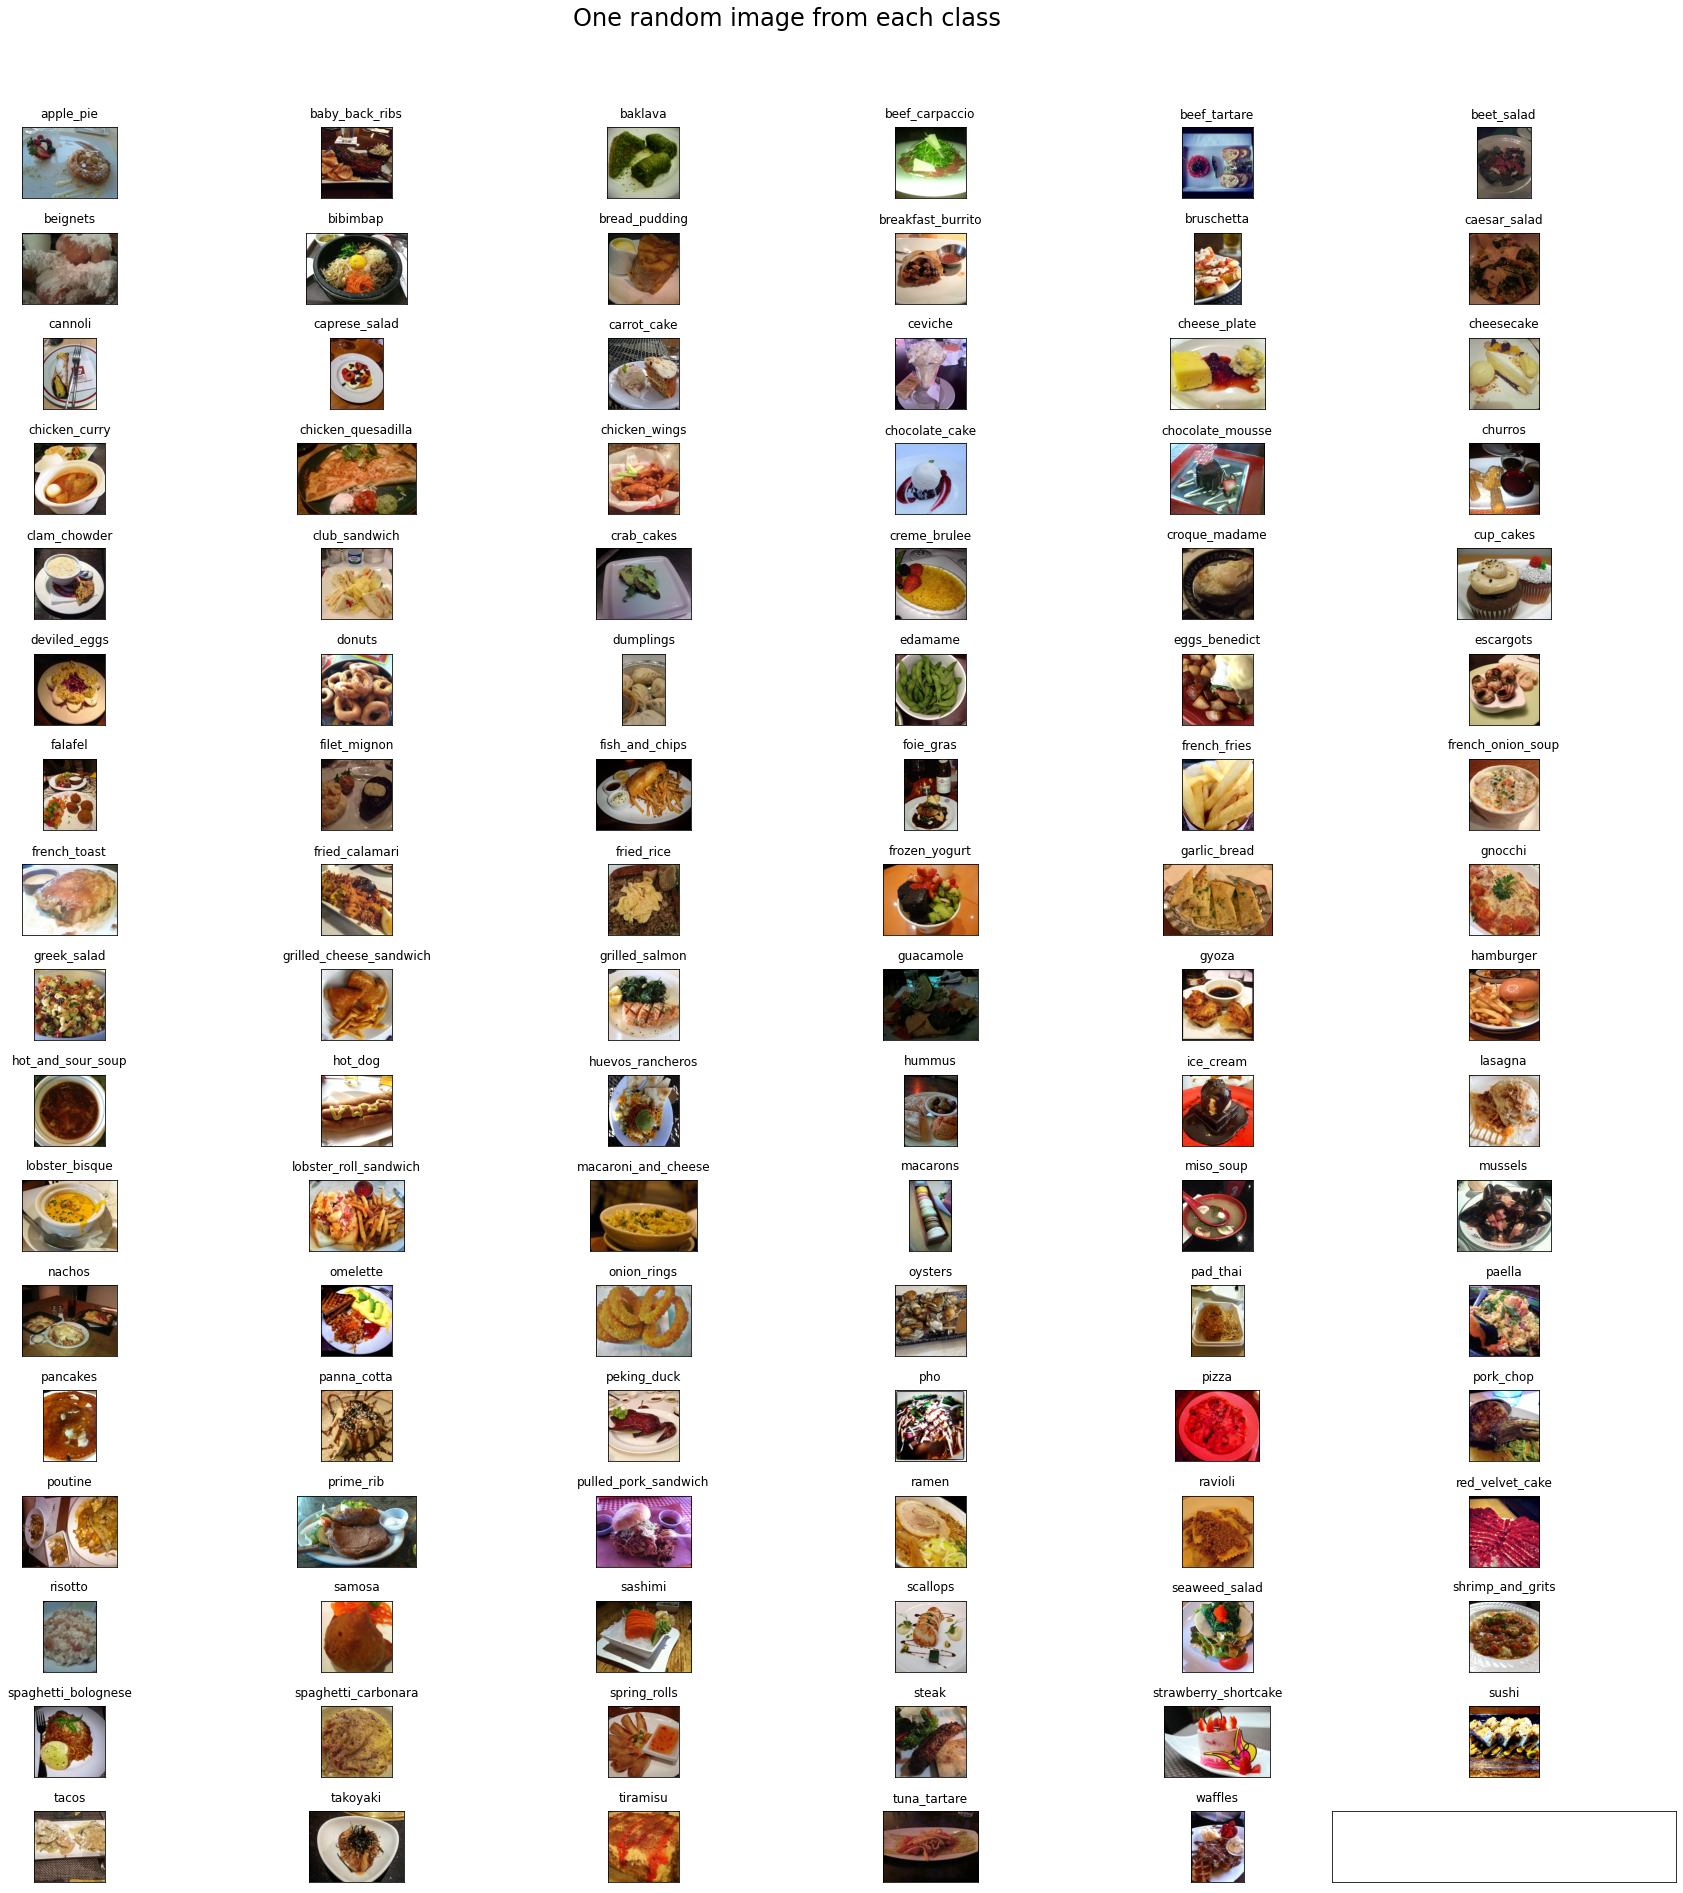

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25, 25))
fig.suptitle('One random image from each class', fontsize=24, y=1.05)

data_dir = 'food-101/images'
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0

for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id]
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
      continue
    
    food_selected_images = os.listdir(os.path.join(data_dir, food_selected))

    food_selected_random = np.random.choice(food_selected_images)

    img = plt.imread(os.path.join(data_dir, food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad=10)

plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout()

In [ ]:
from collections import defaultdict
from shutil import copy

def prepare_data(filepath, src, dest):
  classes_images = defaultdict(list)

  with open(filepath, 'r') as txt:
    paths = [read.strip() for read in txt.readlines()]
    for p in paths:
      food = p.split('/')
      classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print('\nCopying images into', food)
    if not os.path.exists(os.path.join(dest, food)):
      os.makedirs(os.path.join(dest, food))
    for i in classes_images[food]:
      copy(os.path.join(src, food, i), os.path.join(dest, food, i))
  print('Copying Done')

In [ ]:
prepare_data('food-101/meta/train.txt', 'food-101/images', 'train')


Copying images into apple_pie

Copying images into baby_back_ribs

Copying images into baklava

Copying images into beef_carpaccio

Copying images into beef_tartare

Copying images into beet_salad

Copying images into beignets

Copying images into bibimbap

Copying images into bread_pudding

Copying images into breakfast_burrito

Copying images into bruschetta

Copying images into caesar_salad

Copying images into cannoli

Copying images into caprese_salad

Copying images into carrot_cake

Copying images into ceviche

Copying images into cheesecake

Copying images into cheese_plate

Copying images into chicken_curry

Copying images into chicken_quesadilla

Copying images into chicken_wings

Copying images into chocolate_cake

Copying images into chocolate_mousse

Copying images into churros

Copying images into clam_chowder

Copying images into club_sandwich

Copying images into crab_cakes

Copying images into creme_brulee

Copying images into croque_madame

Copying images into cup_ca

In [ ]:
prepare_data('food-101/meta/test.txt', 'food-101/images', 'test')


Copying images into apple_pie

Copying images into baby_back_ribs

Copying images into baklava

Copying images into beef_carpaccio

Copying images into beef_tartare

Copying images into beet_salad

Copying images into beignets

Copying images into bibimbap

Copying images into bread_pudding

Copying images into breakfast_burrito

Copying images into bruschetta

Copying images into caesar_salad

Copying images into cannoli

Copying images into caprese_salad

Copying images into carrot_cake

Copying images into ceviche

Copying images into cheesecake

Copying images into cheese_plate

Copying images into chicken_curry

Copying images into chicken_quesadilla

Copying images into chicken_wings

Copying images into chocolate_cake

Copying images into chocolate_mousse

Copying images into churros

Copying images into clam_chowder

Copying images into club_sandwich

Copying images into crab_cakes

Copying images into creme_brulee

Copying images into croque_madame

Copying images into cup_ca

In [ ]:
del foods_sorted[0]

foods_sorted

['baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster_roll_sandwich

In [ ]:
food_list = ['pizza', 'ice_cream', 'hamburger', 'steak', 'hot_dog', 'churros', 'tiramisu', 'spaghetti_carbonara','tacos', 'sushi']

In [ ]:
from shutil import copytree, rmtree

def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest)
  os.makedirs(dest)
  for food_item in food_list:
    print('Copying images into', food_item)
    copytree(os.path.join(src, food_item), os.path.join(dest, food_item))

In [ ]:
dataset_mini(food_list, 'train', 'train_mini')

Copying images into pizza
Copying images into ice_cream
Copying images into hamburger
Copying images into steak
Copying images into hot_dog
Copying images into churros
Copying images into tiramisu
Copying images into spaghetti_carbonara
Copying images into tacos
Copying images into sushi


In [ ]:
dataset_mini(food_list, 'test', 'test_mini')

Copying images into pizza
Copying images into ice_cream
Copying images into hamburger
Copying images into steak
Copying images into hot_dog
Copying images into churros
Copying images into tiramisu
Copying images into spaghetti_carbonara
Copying images into tacos
Copying images into sushi


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size=32

train_data_dir = 'train_mini'
test_data_dir = 'test_mini'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
test_data = train_datagen.flow_from_directory(test_data_dir,
                                              target_size=(224, 224),
                                              batch_size=batch_size,
                                              class_mode='categorical') 

Found 2500 images belonging to 10 classes.


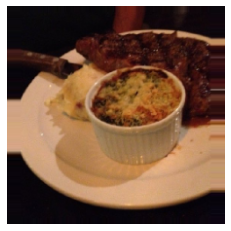

In [ ]:
images, labels = train_data.next()

i = np.random.randint(32)
plt.imshow(images[i])
plt.axis(False);

In [ ]:
labels[i]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception = InceptionV3(weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(10, kernel_regularizer=l2(0.005), activation='softmax')(x)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.models import Sequential, Model

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_10class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_10class.log')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_data,
                    steps_per_epoch = 32,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    epochs=50,
                    callbacks=[csv_logger, checkpointer]
                    )

Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 2.4875 - accuracy: 0.1133
Epoch 1: val_loss improved from inf to 2.46240, saving model to best_model_10class.hdf5
32/32 [==============================] - 130s 3s/step - loss: 2.4875 - accuracy: 0.1133 - val_loss: 2.4624 - val_accuracy: 0.1196
Epoch 2/50
32/32 [==============================] - ETA: 0s - loss: 2.4358 - accuracy: 0.1270
Epoch 2: val_loss improved from 2.46240 to 2.31913, saving model to best_model_10class.hdf5
32/32 [==============================] - 66s 2s/step - loss: 2.4358 - accuracy: 0.1270 - val_loss: 2.3191 - val_accuracy: 0.1752
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 2.3780 - accuracy: 0.1328
Epoch 3: val_loss improved from 2.31913 to 2.21701, saving model to best_model_10class.hdf5
32/32 [==============================] - 66s 2s/step - loss: 2.3780 - accuracy: 0.1328 - val_loss: 2.2170 - val_accuracy: 0.2276
Epoch 4/50
32/32 [==============================] - ETA: 0

In [ ]:
model.save('best_model_10class.hdf5')

In [ ]:
def load_and_prep_image(file, img_shape=224):

  img = tf.io.read_file(file)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255

  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f'predictione: {pred_class}')
  plt.axis(False);


In [ ]:
foods= ['churros', 'hamburger', 'hot_dog', 'ice_cream', 'pizza', 'spaghetti_carbonara', 'steak', 'sushi', 'tacos', 'tiramisu']

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

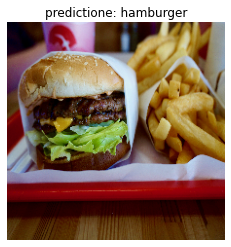

In [ ]:
pred_and_plot(model, '03-hamburger.jpeg', foods)

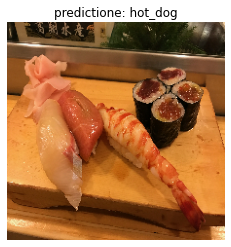

In [ ]:
pred_and_plot(model, '03-sushi.jpeg', foods)

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

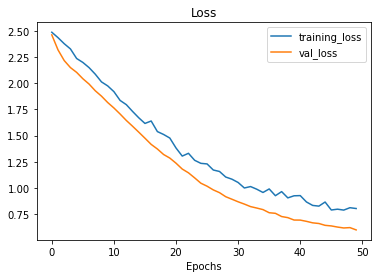

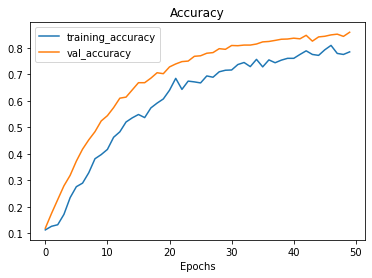

In [ ]:
plot_loss_curves(history)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model = Sequential([
                      Conv2D(filters=32,
                             kernel_size=3,
                             activation='relu',
                             input_shape=(224, 224, 3)),
                      Conv2D(32, 3, activation='relu'),
                      MaxPool2D(2),
                      Conv2D(32, 3, activation='relu'),
                      Conv2D(32, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(100, activation='relu'),
                      Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

## Load model


In [ ]:
new_model = tf.keras.models.load_model('best_model_10class.hdf5')

In [ ]:
new_model.evaluate(train_data)

235/235 [==============================] - 137s 569ms/step - loss: 0.6525 - accuracy: 0.8451


[0.6524863243103027, 0.8450666666030884]

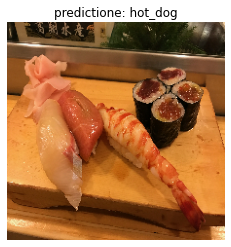

In [ ]:
pred_and_plot(new_model, '03-sushi.jpeg', foods)

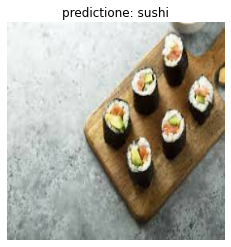

In [ ]:
pred_and_plot(new_model, 'sushi1.jpeg', foods)

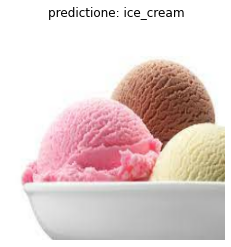

In [ ]:
pred_and_plot(new_model, 'sorvete.jpeg', foods)